In [44]:
# 依赖导入
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [8]:
# 加载第一张图片
pic1_path = "/Users/mac/Desktop/chapter3_verify/1.png"
pic1 = load_img(pic1_path, target_size=(224,224))
print(pic1)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FCB8A097B10>


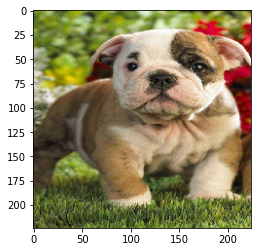

In [9]:
# 可视化
fig1 = plt.figure()
plt.imshow(pic1)

In [10]:
# 图片格式转数组格式
pic1_array = img_to_array(pic1)
print(type(pic1_array))
print(pic1_array.shape)

<class 'numpy.ndarray'>
(224, 224, 3)


In [11]:
# 数据预处理
x = np.expand_dims(pic1_array, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [16]:
# 图像核心特征提取
vgg_model = VGG16(weights="imagenet", include_top=False)
features = vgg_model.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [15]:
# flatten展开
features =  features.reshape(1, 7*7*512)
print(features.shape)

(1, 25088)


In [31]:
# 批量图片数据导入
folder_path = "/Users/mac/Desktop/chapter3_task2_data/"
# 定义获取文件夹中图片文件的方法
def get_image_path_list(dir_path):
    img_path = []
    for filename in os.listdir(dir_path):                             
        if filename.endswith(".jpg"):
            img_path.append(dir_path + "/" + filename)
    return img_path

cats_list = get_image_path_list(folder_path+"cats")
dogs_list = get_image_path_list(folder_path+"dogs")

def image_feature_preprocessing(vgg16_model, image_path):
    image = load_img(image_path, target_size=(224,224))
    image_array = img_to_array(image)
    features = np.expand_dims(image_array, axis=0)
    features = preprocess_input(features)
    x = vgg16_model.predict(features)
    x = x.reshape(1, 25088)
    return x

features1 = np.zeros([len(cats_list), 25088])

for i in range(len(cats_list)):
    feature_i = image_feature_preprocessing(vgg_model, cats_list[i])
    print('preprocessed:',cats_list[i])
    features1[i] = feature_i
    
features2 = np.zeros([len(dogs_list),25088])

for i in range(len(dogs_list)):
    feature_i = image_feature_preprocessing(vgg_model, dogs_list[i])
    print('preprocessed:',dogs_list[i])
    features2[i] = feature_i
    
y1 = np.zeros(len(cats_list))
y2 = np.ones(len(dogs_list))

#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)


preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_186.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_192.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_145.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_151.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_179.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_5.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_233.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_15.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_227.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_29.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_28.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_226.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_4.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_14.jpg
preprocessed: 

preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_134.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_120.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_281.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_295.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_58.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_242.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_64.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_256.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_70.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_71.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_257.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_65.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_243.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_59.jpg
preprocessed

preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_117.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_103.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_164.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_170.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_158.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_212.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_34.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_206.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_20.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_21.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_207.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_35.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_213.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/cats/cats_159.jpg
preprocess

preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_204.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_6.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_10.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_38.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_39.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_11.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_7.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_205.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_211.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_239.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_173.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_167.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_198.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_100.jpg
preprocessed: 

preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_55.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_41.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_69.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_269.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_255.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_241.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_296.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_282.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_123.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_137.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_133.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_127.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_286.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_292.jpg
preproces

preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_219.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_231.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_225.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_31.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_25.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_19.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_18.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_24.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_30.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_224.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_230.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_218.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_152.jpg
preprocessed: /Users/mac/Desktop/chapter3_task2_data/dogs/dogs_146.jpg
preprocessed

In [34]:
# 训练数据，测试数据分离
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(480, 25088) (120, 25088)


In [37]:
# 建立mlp模型
mlp_model = Sequential()
# 隐藏层
mlp_model.add(Dense(units=10, input_dim=25088, activation="relu"))
# 输出层
mlp_model.add(Dense(units=1, activation="sigmoid"))
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 训练参数配置
mlp_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
# 模型训练
mlp_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9951
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9879
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 11/50
15/15 [

In [52]:
# 模型预测结果评估
y_train_predict = (mlp_model.predict(x_train) > 0.5).astype("int32")
train_score = accuracy_score(y_train, y_train_predict)
print(train_score)

1.0


In [53]:
y_test_predict = (mlp_model.predict(x_test) > 0.5).astype("int32")
test_score = accuracy_score(y_test, y_test_predict)
print(test_score)

0.975


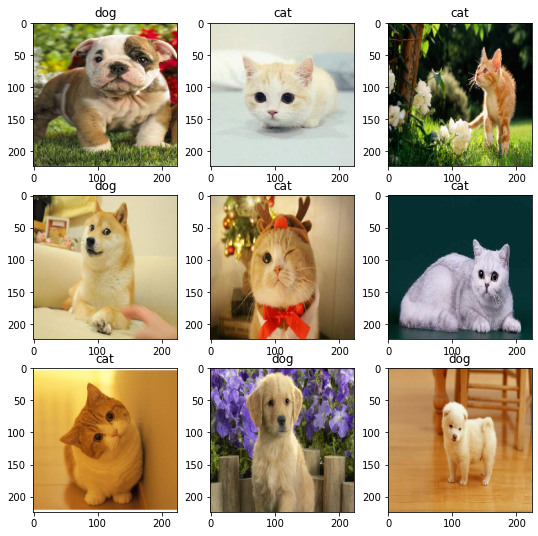

In [58]:
# 本地图片验证
# 图片加载 > 图片格式转化 > 数据预处理 > vgg16特征信息提取 > 模型预测
fig2 = plt.figure(figsize=(9,9))
for i in range(1, 10):
    pic = "/Users/mac/Desktop/chapter3_verify/{}.png".format(i)
    pic = load_img(pic, target_size=(224,224))
    pic_array = img_to_array(pic)
    pic_array = np.expand_dims(pic_array, axis=0)
    pic_array = preprocess_input(pic_array)
    pic_features = vgg_model.predict(pic_array)
    pic_features = pic_features.reshape(1, 25088)
    result = (mlp_model.predict(pic_features) > 0.5).astype("int32")
    plt.subplot(3,3,i)
    plt.title("cat" if result == 0 else "dog")
    plt.imshow(pic)
